<a href="https://colab.research.google.com/github/irshandyaditya/PCVK_Ganjil_2024/blob/week-5/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Modul 5
# Irshandy Aditya Wicaksana
# TI - 3A / 16

In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Buat Gamma Correction sesuai dengan petunjuk berikut

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


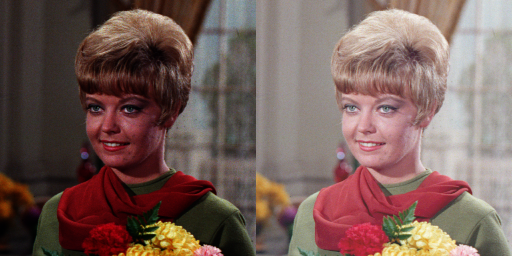

In [ ]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

img = cv.imread('/content/drive/MyDrive/PCVK/img/female.tiff')
gamma_img = np.zeros(img.shape, img.dtype)

for y in range(img.shape[0]):
  for x in range(img.shape[1]):
    for c in range(img.shape[2]):
      gamma_img[y,x,c]= np.clip(255*pow(img[y,x,c]/255, (1/gamma)), 0, 255)

final_frame = cv.hconcat((img, gamma_img))
cv2_imshow(final_frame)

2. Buat Simulasi Image Depth


---


Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada
kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
7bit, maka jumlah warnanya adalah 27 = 128, dst.

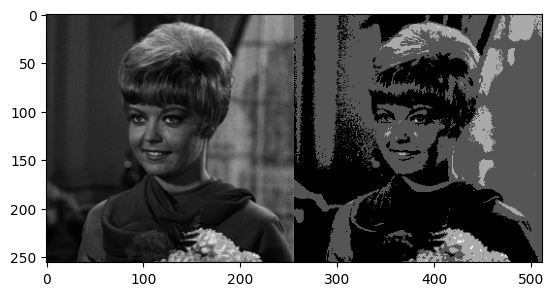

In [ ]:
bit_depth=2
level = 255 / (pow(2, bit_depth)-1)
img = cv.imread('/content/drive/MyDrive/PCVK/img/female.tiff', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(img.shape, img.dtype)

for y in range(img.shape[0]):
  for x in range(img.shape[1]):
    depth_image[y,x]=np.clip(round(img[y,x]/level)*level,0,255)

final_frame = cv.hconcat((img, depth_image))
plt.imshow(final_frame, cmap='gray')

# 3. Buat modul Average Denoising


---



In [ ]:
import cv2 as cv
import numpy as np
import os

# gambar asli
original = cv.imread('/content/drive/MyDrive/PCVK/img/galaxy.jpeg')

# Cek apakah direktori output sudah ada atau belum
output_dir = '/content/drive/MyDrive/PCVK/img/noises'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Generate 30 gambar noise dengan operasi Average Denoising
for i in range(100):
    # Tambahkan noise Gaussian ke gambar asli
    noise = np.random.normal(0, 25, original.shape).astype(np.uint8)
    noisy_image = cv.add(original, noise)

    # Simpan gambar dengan noise
    cv.imwrite(f'{output_dir}/noisy_{i + 1}.jpg', noisy_image)


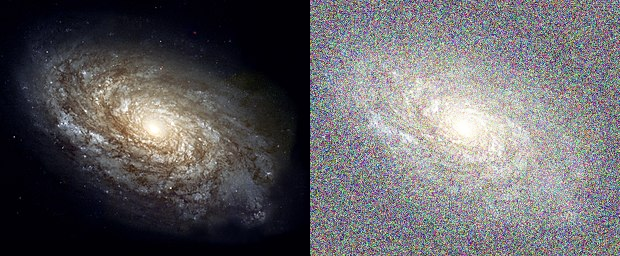

Nilai PSNR adalah 27.945340515135854 (dB)
Nilai MSE adalah 104.3629410282258


In [ ]:
import glob
from math import log10, sqrt

original = cv.imread('/content/drive/MyDrive/PCVK/img/galaxy.jpeg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/img/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  #MSE 0 maka tidak ada noise sama sekali, sehingga PNSR tidak memiliki arti
        return 100, mse
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr, mse


compressed = dst
psnr = PSNR(original, compressed)
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)


psnr, mse = PSNR(original, compressed)
print('Nilai PSNR adalah', psnr, '(dB)')
print('Nilai MSE adalah', mse)

   Jumlah Citra di Average  Nilai PSNR (dB)   Nilai MSE
0                        5        27.993968  103.200916
1                       10        28.132863   99.952587
2                       20        28.317117   95.800693
3                       40        28.546641   90.869103
4                       80        28.784092   86.034215
5                      100        28.835585   85.020153


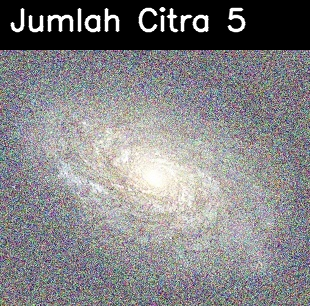

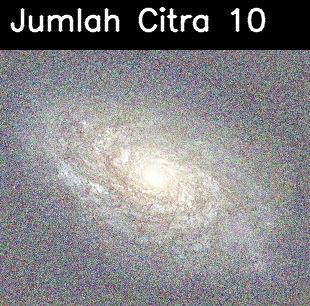

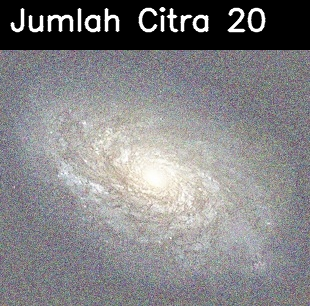

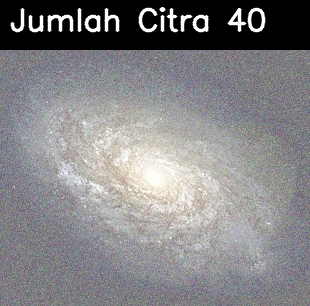

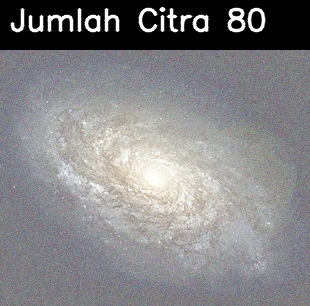

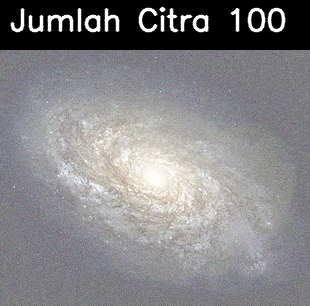

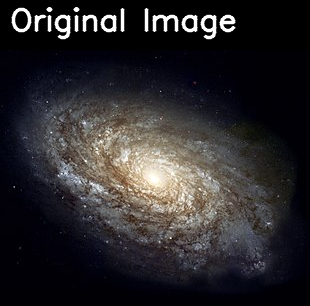

In [ ]:
import cv2 as cv
import glob
import numpy as np
import pandas as pd
from math import log10, sqrt
from google.colab.patches import cv2_imshow  # Import untuk menampilkan gambar di Colab
import os

# Fungsi untuk menghitung nilai PSNR dan MSE
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if mse == 0:  # MSE 0 berarti tidak ada noise sama sekali
        return 100, mse
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr, mse

# Fungsi untuk menambahkan teks judul pada gambar
def add_title(image, title):
    # Menyesuaikan ukuran frame judul agar sesuai dengan lebar gambar asli
    width = image.shape[1]
    title_frame = np.zeros((50, width, 3), dtype=np.uint8)
    title_frame[:] = (0, 0, 0)  # Set warna latar belakang hitam

    # Menambahkan teks pada frame judul
    cv.putText(title_frame, title, (10, 30), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv.LINE_AA)

    # Menggabungkan frame judul dengan gambar
    return cv.vconcat([title_frame, image])

# Membaca gambar asli
original = cv.imread('/content/drive/MyDrive/PCVK/img/galaxy.jpeg')

# Membaca gambar noisy yang telah di-generate
output_dir = '/content/drive/MyDrive/PCVK/img/noises'
cv_img = []
for img in glob.glob(f'{output_dir}/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

# Daftar jumlah citra yang akan digunakan untuk averaging
num_images_to_average = [5, 10, 20, 40, 80, 100]
results = []

# Melakukan averaging untuk setiap jumlah citra
for num in num_images_to_average:
    if num > len(cv_img):
        print(f'Jumlah citra {num} melebihi jumlah citra yang tersedia.')
        continue

    dst = cv_img[0]
    for i in range(num):
        if i == 0:
            pass
        else:
            alpha = 1.0 / (i + 1)
            beta = 1.0 - alpha
            dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

    # Menghitung PSNR dan MSE
    psnr, mse = PSNR(original, dst)

    # Simpan hasil ke dalam daftar
    results.append({'Jumlah Citra di Average': num,
                    'Nilai PSNR (dB)': psnr,
                    'Nilai MSE': mse})

    # Simpan hasil gambar denoised
    cv.imwrite(f'{output_dir}/denoised_average_{num}.jpg', dst)

# Membuat DataFrame untuk menampilkan hasil
results_df = pd.DataFrame(results)

# Menampilkan tabel hasil
print(results_df)

# Menampilkan gambar hasil dengan judul pada setiap gambar
for result in results:
    num = result['Jumlah Citra di Average']
    denoised_image = cv.imread(f'{output_dir}/denoised_average_{num}.jpg')

    # Menambahkan judul pada gambar denoised
    titled_image = add_title(denoised_image, f'Jumlah Citra {num}')

    # Menampilkan gambar hasil denoised dengan judul
    cv2_imshow(titled_image)  # Menggunakan cv2_imshow untuk menampilkan gambar

# Menampilkan gambar asli dengan judul
titled_original = add_title(original, 'Original Image')
cv2_imshow(titled_original)  # Menampilkan gambar asli dengan judul

# Kesimpulan mengenai hasil PSNR:
PSNR Menurun dengan Peningkatan Jumlah Citra:

1. Penurunan PSNR Seiring Penambahan Jumlah Citra: PSNR cenderung menurun saat jumlah citra yang dirata-ratakan meningkat, terutama antara 40 hingga 80 citra. Ini mengindikasikan bahwa kualitas proses denoising menurun ketika lebih banyak citra digunakan, yang mungkin disebabkan oleh variasi noise di antara citra yang berbeda.

2. Kualitas Denoising Terbaik pada Jumlah Citra Tertentu: Meskipun PSNR tidak meningkat secara signifikan seiring penambahan jumlah citra, hasil terbaik terlihat pada 20 dan 40 citra dibandingkan dengan 5 atau 10 citra. Ini menunjukkan adanya jumlah citra optimal untuk menghasilkan denoising yang lebih baik.

3. Stabilitas MSE: Nilai MSE (Mean Squared Error) relatif stabil dengan sedikit fluktuasi. MSE yang lebih rendah menunjukkan hasil denoising yang lebih mendekati gambar asli, tetapi PSNR yang tidak konsisten menandakan bahwa kualitas visual dapat bervariasi meskipun MSE terlihat baik.

4. Trade-off Antara Kualitas dan Noise: Menambah jumlah citra tidak selalu meningkatkan kualitas PSNR. Hal ini menunjukkan bahwa meskipun lebih banyak data dapat membantu mengurangi noise, variasi noise antar gambar dapat menyebabkan kompromi dalam hasil akhir.


---

Kesimpulan:
Secara keseluruhan, averaging dapat membantu mengurangi noise, tetapi efektivitasnya tergantung pada jumlah citra yang digunakan. Ada titik optimal di mana denoising paling efektif, dan menambah jumlah citra tidak selalu meningkatkan kualitas seperti yang diharapkan. Oleh karena itu, penting untuk mempertimbangkan PSNR dan MSE dalam evaluasi visual yang lebih luas saat menilai hasil denoising.

4. Buat image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff), sedangkan image paling kanan adalah hasilnya:

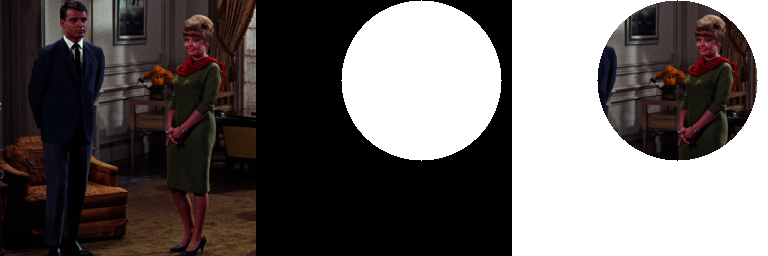

In [ ]:
img = cv.imread('/content/drive/MyDrive/PCVK/img/couple.tiff')
mask = np.zeros(img.shape, img.dtype)
mask = cv.circle(mask, (440, 100), 80, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask,(165, 80), 80, (255,255,255), -1)

result = img & mask & mask2
result[mask==0] = 255
final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini. Tuliskan hasil analisa anda kenapa citra keluarannya seperti itu.

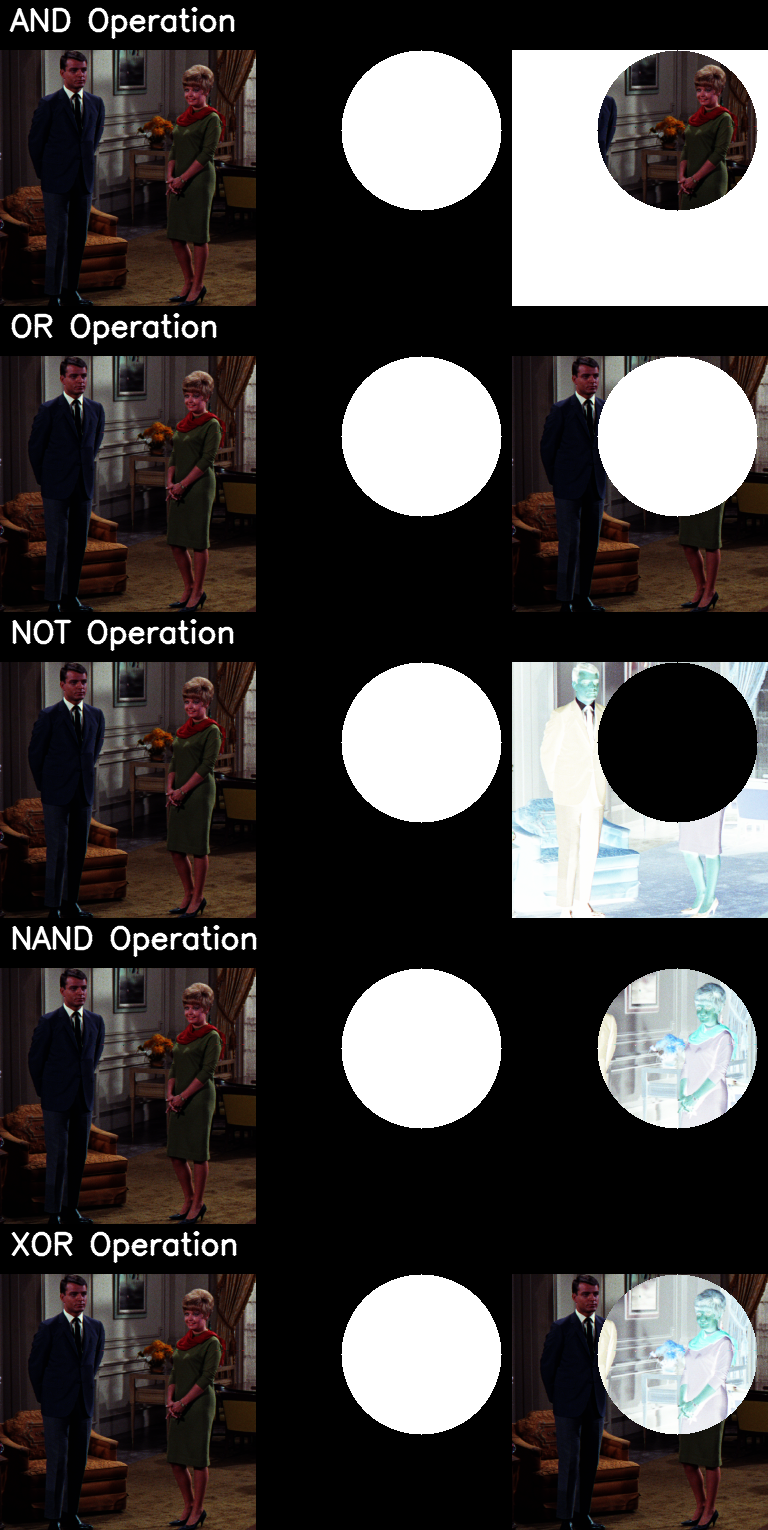

In [ ]:
import cv2 as cv
import numpy as np
from google.colab.patches import cv2_imshow

# Membaca gambar
img = cv.imread('/content/drive/MyDrive/PCVK/img/couple.tiff')

# Membuat satu mask untuk operasi AND
mask = np.zeros(img.shape, img.dtype)
mask = cv.circle(mask, (440, 100), 80, (255, 255, 255), -1)
mask = cv.circle(mask, (165, 80), 80, (255, 255, 255), -1)

# Operasi AND
result_and = img & mask
result_and[mask == 0] = 255

# Membuat mask untuk operasi OR dan menambah lingkaran ke mask yang sama
mask_or = np.zeros(img.shape, dtype=np.uint8)
mask_or = cv.circle(mask_or, (440, 100), 80, (255, 255, 255), -1)
mask_or = cv.circle(mask_or, (165, 80), 80, (255, 255, 255), -1)

# Operasi OR
result_or = img | mask_or

# Operasi NOT
result_not = ~img & ~mask_or

# Operasi NAND
result_nand = ~img & mask_or

# Operasi XOR
result_xor = img ^ mask_or

# Fungsi untuk menambahkan teks judul pada gambar
def add_title(image, title):
    # Menyesuaikan ukuran frame judul agar sesuai dengan lebar gambar asli
    width = image.shape[1]
    title_frame = np.zeros((50, width, 3), dtype=np.uint8)
    title_frame[:] = (0, 0, 0)  # Set warna latar belakang hitam

    # Menambahkan teks pada frame judul
    cv.putText(title_frame, title, (10, 30), cv.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv.LINE_AA)

    # Menggabungkan frame judul dengan gambar
    return cv.vconcat([title_frame, image])

# Menambah judul pada setiap frame hasil operasi
final_and_frame = add_title(cv.hconcat((img, mask, result_and)), 'AND Operation')
final_or_frame = add_title(cv.hconcat((img, mask_or, result_or)), 'OR Operation')
final_not_frame = add_title(cv.hconcat((img, mask_or, result_not)), 'NOT Operation')
final_nand_frame = add_title(cv.hconcat((img, mask_or, result_nand)), 'NAND Operation')
final_xor_frame = add_title(cv.hconcat((img, mask_or, result_xor)), 'XOR Operation')

# Menggabungkan semua hasil ke dalam satu frame besar
all_results_frame = cv.vconcat((final_and_frame, final_or_frame, final_not_frame, final_nand_frame, final_xor_frame))

# Menampilkan hasil keseluruhan dengan judul pada setiap operasi
cv2_imshow(all_results_frame)

# Hasil Analisa:
1. Pembacaan Gambar: Gambar asli yang digunakan adalah couple.tiff, yang dibaca menggunakan cv.imread() dan disimpan dalam variabel img.

2. Pembuatan Mask: Sebuah mask dibuat dengan menambahkan dua lingkaran pada koordinat (440, 100) dan (165, 80), masing-masing dengan radius 80 piksel. Warna lingkaran adalah putih (255, 255, 255) pada gambar RGB. Mask ini memiliki dua area lingkaran dengan intensitas maksimum, sementara area lain tetap hitam (0).

3. Operasi AND: Hasil operasi AND (result_and) menunjukkan bagian gambar di dalam lingkaran. Piksel di luar lingkaran diubah menjadi putih (255) karena hanya piksel yang memiliki nilai non-zero di gambar dan mask yang dipertahankan.

4. Operasi OR: Pada hasil OR (result_or), nilai piksel dari gambar dan mask digabungkan. Area lingkaran akan mempertahankan nilai asli gambar, sementara area lainnya mempertahankan nilainya sendiri.

5. Operasi NOT: Hasil NOT (result_not) membalik (negatif) nilai warna gambar dan mask. Piksel di luar lingkaran pada mask dibalik, menghasilkan warna yang berlawanan.

6. Operasi NAND: Operasi NAND (result_nand) menghasilkan inversi dari operasi AND. Piksel di dalam lingkaran dibalik, sedangkan bagian lainnya tidak berubah.

7. Operasi XOR: Pada operasi XOR (result_xor), nilai piksel hanya dipertahankan jika gambar dan mask memiliki nilai yang berbeda. Ini menghasilkan area di mana hanya salah satu dari dua input yang memiliki nilai non-zero.

8. Fungsi add_title: Fungsi ini menambahkan judul pada setiap hasil operasi dengan membuat frame hitam di atas gambar. Judul tersebut mempermudah untuk mengenali jenis operasi yang dilakukan, seperti AND, OR, dan sebagainya.

9. Penggabungan Hasil: Hasil dari setiap operasi logika digabungkan secara horizontal (gambar asli, mask, dan hasil operasi), lalu digabungkan secara vertikal menjadi satu gambar besar yang menampilkan semua hasil operasi.

10. Menampilkan Hasil: Semua hasil operasi ditampilkan menggunakan cv2_imshow. Setiap baris terdiri dari tiga gambar: gambar asli, mask, dan hasil operasi, dengan penjelasan pada bagian atas setiap gambar.


---


Kesimpulan:
Kode ini menunjukkan hasil dari berbagai operasi logika biner pada gambar menggunakan OpenCV. Setiap operasi menghasilkan efek yang berbeda tergantung pada sifat operasinya, dan penambahan judul pada gambar membantu dalam memahami hasil dari masing-masing operasi.